In [1]:
#! pip install scikit-plot

Solving environment: done

## Package Plan ##

  environment location: /Users/paulademacker/opt/miniconda3/envs/ba765

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h033912b_0         138 KB  conda-forge
    certifi-2020.12.5          |   py37hf985489_1         143 KB  conda-forge
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    libblas-3.8.0              |           14_mkl          10 KB  conda-forge
    libcblas-3.8.0             |           14_mkl          10 KB  conda-forge
    llvm-openmp-11.0.1         |       h7c73e74_0         268 KB  conda-forge
    openssl-1.1.1j             |       hbcf498f_0         1.9 MB  conda-forge
    scikit-learn-0.24.1        |   py37hbcf18d0_0         6.5 MB  conda-forge
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  c

In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import scikitplot as skplot

In [6]:
# reading the csv 
cc_org = pd.read_csv("CC GENERAL.csv")
cc_org.shape

(8950, 18)

In [7]:
# first look at the data set
cc_org.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [8]:
# looking at the data set and the data type 
cc_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# looking for missing value 
# detected missing values for "minimum payments" and "credit_limit"
cc_org.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
cc_org.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [11]:
cc_org.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [12]:
# drop "cust_id" since it doesn't have any role in determining the cluster and is not numeric
cc_org = cc_org.drop(columns = "CUST_ID")

In [13]:
# change all missing value under "minimum payments" to median
# we chose the median because the mean was significantly higher and seemed not appropriate
cc_org['MINIMUM_PAYMENTS'].fillna(cc_org['MINIMUM_PAYMENTS'].median(), inplace=True)

In [14]:
# Just 1 value is missing at CREDIT_LIMIT feature, we can simply drop it and never think about it again.
cc_clean = cc_org.dropna()

In [15]:
# lower case all column names
cc_clean.columns = cc_clean.columns.str.lower()

In [16]:
# verify that we don't have any missing values left
cc_clean.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [17]:
# since our dataset is too big for hclust, we are gonna pick a sample which include 1500 rows
cc_new = cc_clean.sample(n=1500)

<AxesSubplot:>

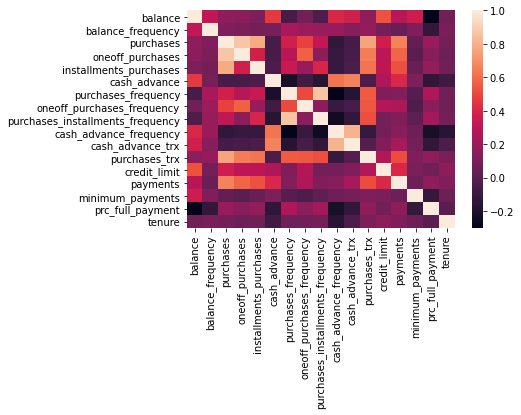

In [18]:
# correlations
cc_corr = cc_new.corr()
sns.heatmap(cc_corr)

In [19]:
# using standardscaler to reduce the distance of each variable
sc = StandardScaler()
xs = sc.fit_transform(cc_new)
X = pd.DataFrame(xs, index=cc_new.index, columns=cc_new.columns)

In [20]:
# hclust
# going to do euclidean, cosine and cityblock distance
# no jaccard since this is more for categorical problems
diste = pdist(X.values)
distc = pdist(X.values, metric='cosine')
distm = pdist(X.values, metric ='cityblock')


hclust_e = linkage(diste)
hclust_c = linkage(distc)
hclust_m = linkage(distm)

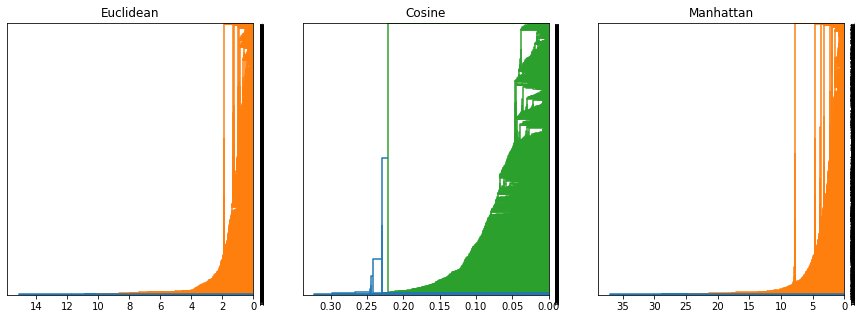

In [21]:
#both plot
LINKS = [hclust_e, hclust_c, hclust_m]
TITLE = ['Euclidean','Cosine','Manhattan']

plt.figure(figsize=(15,5))

#loop and build our plot
for i, m in enumerate(LINKS):
  plt.subplot(1,3,i+1)
  plt.title(TITLE[i])
  dendrogram(m,
             #labels = ps.index
             leaf_rotation=90,
             # leaf_font_size=10,
             orientation='left')
plt.show()

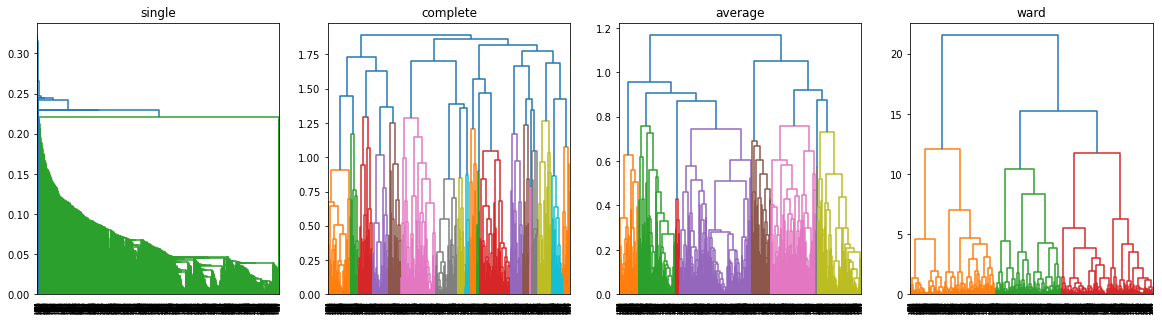

In [22]:
# picking cosine ans using 4 different methods to detect the clusters
METHODS = ['single', 'complete', 'average','ward']
plt.figure(figsize=(20,5))

for i, m in enumerate(METHODS):
  plt.subplot(1,4,i+1)
  plt.title(m)
  dendrogram(linkage(distc, method=m),
             leaf_rotation=90)
plt.show()

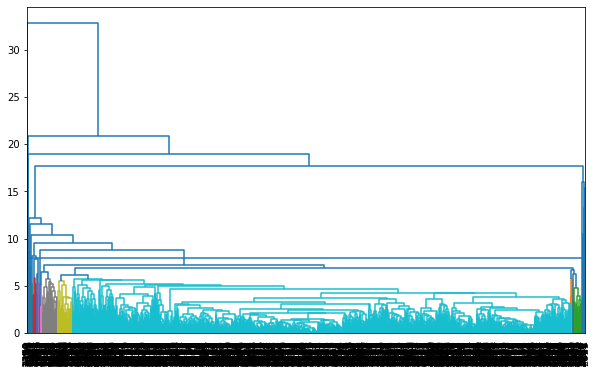

In [23]:
# cosine and average seems like a good combination, so let's take a closer look
plt.figure(figsize=(10, 6))

avg = linkage(X.values, method="average")
dendrogram(avg,
          labels = X.index,
          leaf_rotation=90,
          leaf_font_size=10, color_threshold=6)

plt.axhline(y=8)
plt.show()

In [24]:
# using cosine + complete
# the labels with 4 clusters
labs = fcluster(linkage(distc, method='average'), 4, criterion='maxclust')

# confirm
np.unique(labs)

array([1, 2, 3, 4], dtype=int32)

In [25]:
# add a cluster column to the stocks data set
cc_new['cluster'] = labs

#How many credit card per cluster assignment?
cc_new.cluster.value_counts(dropna=False,sort=False)

1    123
2    698
3    117
4    562
Name: cluster, dtype: int64

In [26]:
# Select the number of components:our data in the lower dimensions explains 95% of variacne of our orginal data
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(cc_clean)

In [27]:
# Use KMeans clustering algorithm to extracts clusters of information
K_model = [KMeans(n_clusters=k,random_state=820).fit(X_pca) for k in range(1,10)]

Text(0.5, 1.0, 'Inertia Method')

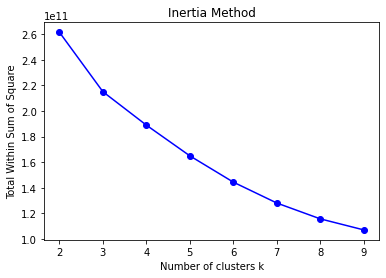

In [28]:
# Inertia
inertia_M = [model.inertia_ for model in K_model[1:10]]
plt.plot(range(2,10),inertia_M,"bo-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Square")
plt.xticks([2,3,4,5,6,7,8,9])
plt.title("Inertia Method")

# no real elbow is shown

([<matplotlib.axis.XTick at 0x7f9856a97290>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

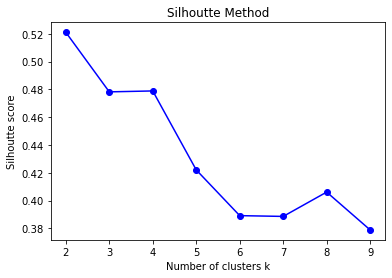

In [29]:
# Silhoutte
silhoutte_scores = [silhouette_score(X_pca,model.labels_) for model in K_model[1:10]]
plt.plot(range(2,10),silhoutte_scores,"bo-")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhoutte score")
plt.title("Silhoutte Method")
plt.xticks([2,3,4,5,6,7,8,9])

# k=2 gives us the highest silhouette score - Qiqi
# K=4 seems like a good option - just 2 clusters could be not enough, also 2 clusters seems really categorical (Hclust = jaccard?!) - Paula

In [30]:
# another method: KMeans 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(cc_clean)

# Kmeans for 2 to 8 clusters
KS = range(2, 10)

# storage
inertia = []
silo = []

for k in KS:
  km = KMeans(k)
  km.fit(X_pca)
  labs = km.predict(X_pca)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(X_pca, labs))

print(silo)

[0.5215116121201231, 0.4778972602943231, 0.41526614624616387, 0.4164363880549091, 0.4230077345360755, 0.38931567807655404, 0.4063597204691596, 0.379658882427988]


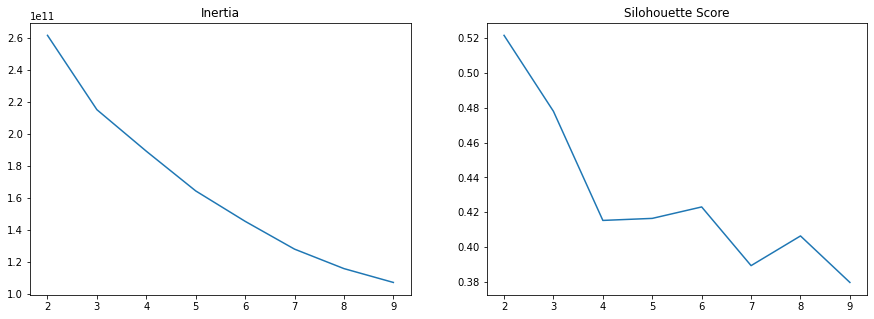

In [31]:
#plot 
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KS, silo)

plt.show()

In [32]:
pca = PCA()
pcs = pca.fit_transform(cc_clean)
# shape confirmation (rows/features) are identical SHAPES
pcs.shape == cc_clean.shape

True

<AxesSubplot:>

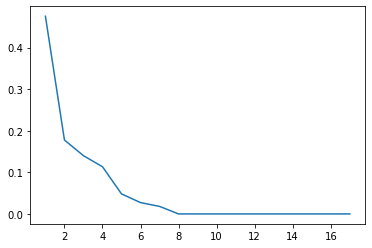

In [33]:
# first, lets get the explained variance
# elbow plot

varexp = pca.explained_variance_ratio_
sns.lineplot(range(1, len(varexp)+1), varexp)

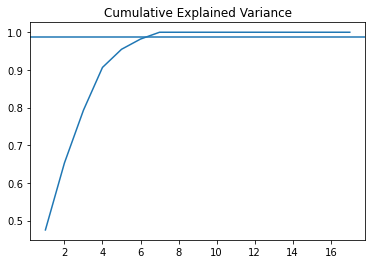

In [34]:
# cumulative variance

plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.987)

In [35]:
# quick function to construct the barplot easily
def ev_plot(ev):
  y = list(ev)
  x = list(range(1,len(ev)+1))
  return x, y

<AxesSubplot:>

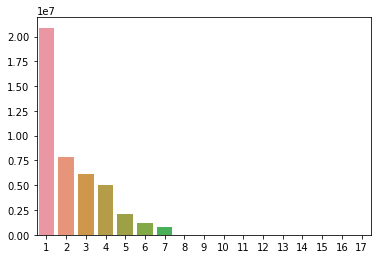

In [36]:
x, y = ev_plot(pca.explained_variance_)
sns.barplot(x, y)